In [75]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset: Studienanfänger: Bundesländer, Semester, Nationalität,Geschlecht

Source: Statistisches Bundesamt 

License: [Data licence Germany – attribution – Version 2.0](http://www.govdata.de/dl-de/by-2-0)

URL: https://www-genesis.destatis.de/genesis/downloads/00/tables/21311-0014_00.csv

URI: https://www.govdata.de/web/guest/suchen/-/details/studienanfanger-bundeslander-semester-nationalitatgeschlecht

## Information

### What is contained in the dataset?

The dataset contains the number of first-year students per winter semester in all 16 federal states from 1998 to 2021. Data is splitted in male and female students as well as german students and students of other nationality.

### Encoding

The file is encoded in *ISO-8859-1* (sometimes referred to as *Latin 1*). Refer to this [list of Python standard encoding](https://docs.python.org/3/library/codecs.html#standard-encodings).

### Format

From the URL we infer that the dataset is provided as a CSV file.

### File header

This is the header of the CSV file:

```
GENESIS-Tabelle: 21311-0014
Studienanfänger: Bundesländer, Semester, Nationalität,;;;;;;;;;;
Geschlecht;;;;;;;;;;
Statistik der Studenten;;;;;;;;;;
Studienanfänger (Anzahl);;;;;;;;;;
;;Deutsche;Deutsche;Deutsche;Ausländer;Ausländer;Ausländer;Insgesamt;Insgesamt;Insgesamt
;;männlich;weiblich;Insgesamt;männlich;weiblich;Insgesamt;männlich;weiblich;Insgesamt
```

## Tasks

### `(A)` Read in the dataframe

The column names are not provided in the csv file, we suggest to use the following ones:
|                  Content of column(s)                  |          Column title in DataFrame         |
|:---------------------------------------------------:|:------------------------------------------:|
| Federal state                                       | `"federal_state"`                              |
| Winter semester                                     | `"winter_semester"`                            |
| Count for females and males with german nationality | `"count_german_female"` and `"count_other_female"` |
| Count for females and males with other nationality  | `"count_other_female"` and `"count_other_male"`    |

*Hint*: Have a look at the *end* of the dataframe. There might be some rows that have to be removed before you can work with the data.

In [76]:
df = pd.read_csv('https://www-genesis.destatis.de/genesis/downloads/00/tables/21311-0014_00.csv', 
                 sep=';', 
                 encoding='latin1',
                 skiprows=7,
                 skipfooter=3,
                 usecols=[0,1,2,3,5,6],
                 names = ["Bundesland", "Wintersemester", "german_male", "german_female", "other_male", "other_female"],)


/tmp/ipykernel_29871/2541078011.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('https://www-genesis.destatis.de/genesis/downloads/00/tables/21311-0014_00.csv',


The following cells will help you check if the file has been imported as intended.

In [77]:
df.tail(10)

,Bundesland,Wintersemester,german_male,german_female,other_male,other_female
374,Thüringen,WS 2012/13,3967,3985,798,808
375,Thüringen,WS 2013/14,3559,3746,903,928
376,Thüringen,WS 2014/15,3227,3524,968,1006
377,Thüringen,WS 2015/16,3264,3548,993,918
378,Thüringen,WS 2016/17,3927,4070,949,1044
379,Thüringen,WS 2017/18,3287,3682,1157,1005
380,Thüringen,WS 2018/19,3077,3709,1120,1001
381,Thüringen,WS 2019/20,4180,6150,1622,1577
382,Thüringen,WS 2020/21,5117,9450,1467,1747
383,Thüringen,WS 2021/22,5556,10167,1907,2205


In [78]:
df.head(10)

,Bundesland,Wintersemester,german_male,german_female,other_male,other_female
0,Baden-Württemberg,WS 1998/99,12966,10170,2580,2878
1,Baden-Württemberg,WS 1999/00,13775,11988,3337,3409
2,Baden-Württemberg,WS 2000/01,15696,13391,3580,3702
3,Baden-Württemberg,WS 2001/02,17040,14816,3894,4146
4,Baden-Württemberg,WS 2002/03,16670,15542,4252,4478
5,Baden-Württemberg,WS 2003/04,18772,15599,4346,4736
6,Baden-Württemberg,WS 2004/05,17264,14928,3929,4467
7,Baden-Württemberg,WS 2005/06,17086,14870,3925,4098
8,Baden-Württemberg,WS 2006/07,16484,15019,3687,4064
9,Baden-Württemberg,WS 2007/08,16705,15318,3438,3883


In [79]:
df.sample(10)

,Bundesland,Wintersemester,german_male,german_female,other_male,other_female
101,Bremen,WS 2003/04,2390,2029,532,552
141,Hamburg,WS 2019/20,5423,6128,1443,1482
302,Sachsen,WS 2012/13,8089,6973,2091,1855
29,Bayern,WS 2003/04,21548,18170,2806,3922
194,Niedersachsen,WS 2000/01,9170,9407,1540,1603
5,Baden-Württemberg,WS 2003/04,18772,15599,4346,4736
34,Bayern,WS 2008/09,22433,21396,3183,3730
361,Thüringen,WS 1999/00,3221,3312,296,284
363,Thüringen,WS 2001/02,3988,3750,296,358
290,Sachsen,WS 2000/01,8101,7060,770,914


### `(T)` Convert to long format

Convert the `DataFrame` to a long format with the following column labels (*Hint*: Have a look at the documentation of the [`pd.melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function.): 
* `"federal_state"` and `"winter_semester"`. These are the same columns as in the original `DataFrame`.
* `"count"`: Number of first-year students of a certain nationality (other or german) and gender (female or male).
* `"nationality_and_gender"`: Column with values being one of `"count_[female|male]_[other|german]"`.

In [80]:
df_m = pd.melt(df, 
               id_vars=["Bundesland", "Wintersemester"], 
               var_name="nationality_and_gender", 
               value_name="count")

In [81]:
df_m.head()

,Bundesland,Wintersemester,nationality_and_gender,count
0,Baden-Württemberg,WS 1998/99,german_male,12966
1,Baden-Württemberg,WS 1999/00,german_male,13775
2,Baden-Württemberg,WS 2000/01,german_male,15696
3,Baden-Württemberg,WS 2001/02,german_male,17040
4,Baden-Württemberg,WS 2002/03,german_male,16670


### `(A)` Add new columns 

Use the content of the `"nationality_and_gender"` column to generate columns: 
* `"nationality"`: Column with values either being "german" or "other".
* `"gender"`: Column with values either being "female" or "male".
   
Finally, the column `"nationality_and_gender"` should be removed from the `DataFrame`. 

In [82]:

df_s = df_m
df_s = (df_s
            .assign(nationality = df_s.nationality_and_gender.str.split('_').apply(lambda x: x[0]),
                    gender = df_s.nationality_and_gender.str.split('_').apply(lambda x: x[1]))
            
            .drop('nationality_and_gender', axis=1)
        )

In [83]:
df_s.head()

,Bundesland,Wintersemester,count,nationality,gender
0,Baden-Württemberg,WS 1998/99,12966,german,male
1,Baden-Württemberg,WS 1999/00,13775,german,male
2,Baden-Württemberg,WS 2000/01,15696,german,male
3,Baden-Württemberg,WS 2001/02,17040,german,male
4,Baden-Württemberg,WS 2002/03,16670,german,male


### `(R)`  Datatypes

Change the type of the columns in the following manner: 
* `"federal_state"`: category
* `"winter_semester"`: category
* `"count"`: unsigned 16 bit integer
* `"nationality"`: category
* `"gender"`: category

In [88]:
df_s  = (df_s
            .astype({'Bundesland': 'category',
                     'Wintersemester': 'category',
                     'count': np.uint16,
                     'nationality': 'category',
                     'gender': 'category'})
        )

In [89]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Bundesland      1536 non-null   category
 1   Wintersemester  1536 non-null   category
 2   count           1536 non-null   uint16  
 3   nationality     1536 non-null   category
 4   gender          1536 non-null   category
dtypes: category(4), uint16(1)
memory usage: 10.8 KB


### `(A)`  Visualization

Plot the count of female and male students with german nationality as well as the count of female and male students with other nationality for each winter semester (aggregated over all federal states). Choose a type of plot that allows to easily compare the count of female and male students.

Things to consider when making the plot:
* Use Pandas' plotting capabilities.
* Use axis labels, a legend, and a title.


*Hint*: You can either use the [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) or the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) method and perform the necessary aggregations.


<Axes: xlabel='Wintersemester'>

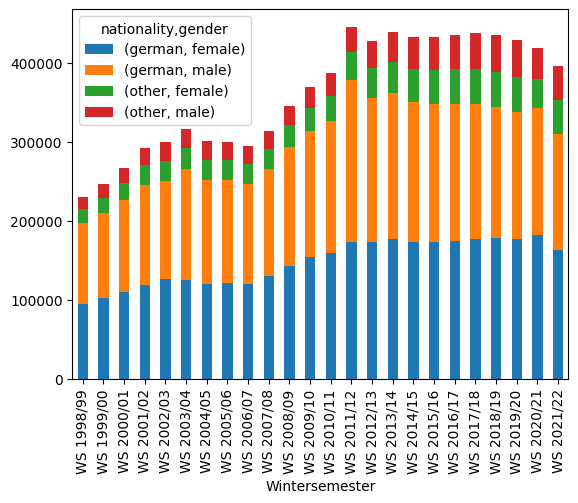

In [90]:
fig, axis = plt.subplots()

(
    df_s
    .pivot_table(index='Wintersemester',
                     columns=['nationality', 'gender'],
                     values='count',
                     aggfunc=np.sum)
    
    .plot.bar(
          stacked=True,
          ax=axis
          )
                     
)

### `(A)` Aggregation

What is total the percentage of female students in each  year?

In [91]:
(
    df_s.query("gender == 'female'")
    ['count']
    .sum()
) / (
    df_s['count'].sum()
)

0.4978854301849176

In [92]:
(
    df_s.groupby(['Wintersemester', 'gender'])
    .sum(numeric_only=True)
    .unstack()
    .assign(percent_female=lambda df_: df_[('count', 'female')] * 100 / df_.sum(axis=1))
)

count         percent_female
gender          female    male               
Wintersemester                               
WS 1998/99      112050  118620      48.575888
WS 1999/00      121444  124874      49.303746
WS 2000/01      130852  136443      48.954152
WS 2001/02      143085  149471      48.908585
WS 2002/03      151569  148080      50.582181
WS 2003/04      151516  165140      47.848770
WS 2004/05      146132  154661      48.582248
WS 2005/06      146201  153638      48.759834
WS 2006/07      145874  149072      49.457867
WS 2007/08      156282  157258      49.844358
WS 2008/09      171325  174300      49.569620
WS 2009/10      184076  185197      49.848215
WS 2010/11      191330  195591      49.449371
WS 2011/12      207614  237706      46.621306
WS 2012/13      210736  217089      49.257524
WS 2013/14      217143  221770      49.472902
WS 2014/15      215191  217089      49.780466
WS 2015/16      216082  216507      49.950877
WS 2016/17      218959  216468      50.286041
WS 2017/18      221737  216000      50.655302
WS 2018/19      223049  212682      51.189610
WS 2019/20      221416  207633      51.606227
WS 2020/21      218783  199914      52.253300
WS 2021/22      205918  189927      52.019856

Which german state has the largest / least count of female students?

In [97]:
df_agg_female = (
    df_s
    .pivot_table(
        index='Bundesland',
        columns=['gender'],
        values=['count'],
        aggfunc=np.sum
    )
    [('count', 'female')]
)

df_agg_female

df_agg_female.idxmin(), df_agg_female.idxmax()

('Saarland', 'Nordrhein-Westfalen')

In [ ]:
...

Ellipsis